In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import sys
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Get the directory of the current script
try:
    # This will work if the script is being run as a file
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Use the current working directory if __file__ is not defined
    current_dir = os.getcwd()

from build_a_pipeline import build_pipeline_P0_foward_price
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

In [2]:

model_performance = []
x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(target_column = 'P1')
datetime_index = x_val.index
# Convert x_train and x_val to NumPy arrays
x_train = x_train.to_numpy()
x_val = x_val.to_numpy()
# Reshape x_train and x_val to have the required 3D shape
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])  # [samples, time_steps=1, features]
x_val = x_val.reshape(x_val.shape[0], 1, x_val.shape[1])    



In [3]:

# Build the LSTM model
multivariate_lstm = Sequential([
    LSTM(195, input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True),
    TimeDistributed(Dense(95, activation='selu')), 
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")
model_performance.append({
    'Model': '1st Model',
    'LayerExtra': 'TimeDistributed, LSTM',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})

Epoch 1/120


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 29926.0957 - root_mean_squared_error: 172.5057 - val_loss: 32332.4082 - val_root_mean_squared_error: 179.8121
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13921.5723 - root_mean_squared_error: 117.4412 - val_loss: 15391.4209 - val_root_mean_squared_error: 124.0622
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9123.3770 - root_mean_squared_error: 94.4586 - val_loss: 4189.1377 - val_root_mean_squared_error: 64.7235
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2088.3442 - root_mean_squared_error: 45.5437 - val_loss: 1210.1401 - val_root_mean_squared_error: 34.7871
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 856.4385 - root_mean_squared_error: 29.2334 - val_loss: 1328.4872 - val_root_mean_squared_error: 36.4484
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 801.9460 - root_mean_squared_error: 28.1710 - val_loss: 1150.9955 - val_root_mean_squared_error: 33.9263
Epoch 7/120
18/

Improved version

## Trying the pipeline with no feature selection dropping

In [4]:
x_train, x_val, X_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(target_column = 'P1', drop_features = False)

# Convert x_train and x_val to NumPy arrays
x_train = x_train.to_numpy()
x_val = x_val.to_numpy()
# Reshape x_train and x_val to have the required 3D shape
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])  # [samples, time_steps=1, features]
x_val = x_val.reshape(x_val.shape[0], 1, x_val.shape[1])    

In [5]:
import os
import random
import numpy as np
import tensorflow as tf

seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

In [6]:
from tensorflow.keras.initializers import GlorotUniform
# Build the LSTM model
multivariate_lstm = Sequential([
    LSTM(195, input_shape=(x_train.shape[1], x_train.shape[2]), kernel_initializer=GlorotUniform(seed=42), return_sequences=True),
    TimeDistributed(Dense(95, activation='selu', kernel_initializer=GlorotUniform(seed=42))), 
    Flatten(),
    Dense(1)  # Output layer
])

# ModelCheckpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint('multivariate_lstm.keras', monitor='val_loss', save_best_only=True)

# EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Optimizer with adjusted learning rate
optimizer = Adam(learning_rate=6e-3, amsgrad=True, clipnorm=1.0)
#optimizer = Adam(learning_rate=0.001, clipnorm=1.0)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train, y_train, epochs=120,
                                validation_data=(x_val, y_val),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final validation RMSE: {val_rmse}")
model_performance.append({
    'Model': '1st Model',
    'LayerExtra': 'TimeDistributed, LSTM',
    'Train RMSE': train_rmse,
    'Validation RMSE': val_rmse
})

Epoch 1/120


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 32347.7656 - root_mean_squared_error: 178.4139 - val_loss: 32665.2246 - val_root_mean_squared_error: 180.7352
Epoch 2/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17895.6973 - root_mean_squared_error: 131.5211 - val_loss: 14616.7627 - val_root_mean_squared_error: 120.8998
Epoch 3/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8603.0068 - root_mean_squared_error: 91.4223 - val_loss: 6670.3125 - val_root_mean_squared_error: 81.6720
Epoch 4/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4218.0093 - root_mean_squared_error: 63.5050 - val_loss: 2119.6729 - val_root_mean_squared_error: 46.0399
Epoch 5/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2049.9880 - root_mean_squared_error: 44.8246 - val_loss: 1336.1304 - val_root_mean_squared_error: 36.5531
Epoch 6/120
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1553.1448 - root_mean_squared_error: 39.2518 - val_loss: 1265.0333 - val_root_mean_squared_error: 35.5673
Epoch 7/120
1

In [7]:
from tensorflow.keras.models import load_model
best_model = load_model('multivariate_lstm.keras')
y_pred = best_model.predict(x_val)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


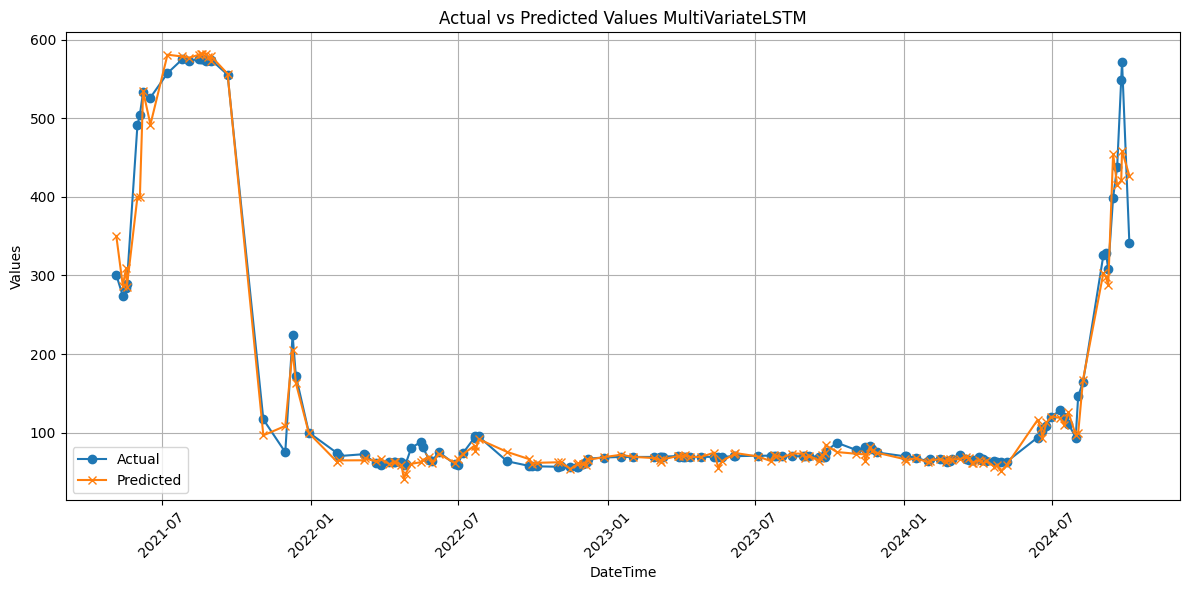

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

y_pred = y_pred.flatten()
predictions_df = pd.DataFrame(y_pred, index=datetime_index, columns=['Predicted'])
predictions_df = predictions_df.sort_index()
y_val = y_val.sort_index()

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(y_val.index, y_val, label='Actual', marker='o')
plt.plot(y_val.index, predictions_df['Predicted'], label='Predicted', marker='x')
plt.title('Actual vs Predicted Values MultiVariateLSTM')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## FINAL TESTING 
- training on val and train
- testing on test

In [16]:
x_train, x_val, x_test, y_train, y_val, y_test = build_pipeline_P0_foward_price(target_column='P1', drop_features=False)
datetime_index = x_test.index
x_train = x_train.to_numpy()
x_val = x_val.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

# merge train and validation
x_train_combined = np.vstack([x_train, x_val])  # Combine x_train and x_val
y_train_combined = np.concatenate([y_train, y_val])  # Combine y_train and y_val

#reshape
x_train_combined = x_train_combined.reshape(x_train_combined.shape[0], 1, x_train_combined.shape[1])  # [samples, time_steps=1, features]
# Test data
x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1]) 

In [24]:
import tensorflow as tf

# Resetting the backend
tf.keras.backend.clear_session()

# Define model
input_shape = (x_train_combined.shape[1], x_train_combined.shape[2])  # Ensure input_shape matches data
multivariate_lstm = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(500, input_shape=input_shape, return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1)
])

# Checkpoint Callback
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'multivariate_lstm.keras',  # Use `.keras` extension
    monitor='val_loss',
    save_best_only=True
)

# Optimizer with updated parameter
optimizer = tf.keras.optimizers.Adam(learning_rate=6e-3, amsgrad=True)

# Loss function and metric
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]

# Compile the model
multivariate_lstm.compile(loss=loss, optimizer=optimizer, metrics=metric)

# Train the model (make sure you pass both x_val and y_val)
history = multivariate_lstm.fit(x_train_combined, y_train_combined, epochs=120,
                                validation_data=(x_test, y_test),
                                callbacks=[early_stopping, model_checkpoint])

# Optionally, print the final RMSE
train_rmse = history.history['root_mean_squared_error'][-1]
val_rmse = history.history['val_root_mean_squared_error'][-1]
print(f"Final train RMSE: {train_rmse}")
print(f"Final test RMSE: {val_rmse}")


C:\Users\veron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/120
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 30033.6250 - root_mean_squared_error: 172.4408 - val_loss: 8065.7471 - val_root_mean_squared_error: 89.8095
Epoch 2/120
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4779.3804 - root_mean_squared_error: 68.9901 - val_loss: 3724.8562 - val_root_mean_squared_error: 61.0316
Epoch 3/120
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2187.0640 - root_mean_squared_error: 46.6790 - val_loss: 2882.6980 - val_root_mean_squared_error: 53.6908
Epoch 4/120
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1787.2181 - root_mean_squared_error: 42.2047 - val_loss: 1862.2740 - val_root_mean_squared_error: 43.1541
Epoch 5/120
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 1367.0240 - root_mean_squared_error: 36.9042 - val_loss: 1436.6973 - val_root_mean_squared_error: 37.9038
Epoch 6/120
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1055.8180 - root_mean_squared_error: 32.4327 - val_loss: 1408.1246 - val_root_mean_squared_error: 37.5250
Ep

In [18]:
from tensorflow.keras.models import load_model
best_model = load_model('multivariate_lstm.keras')
y_pred = best_model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


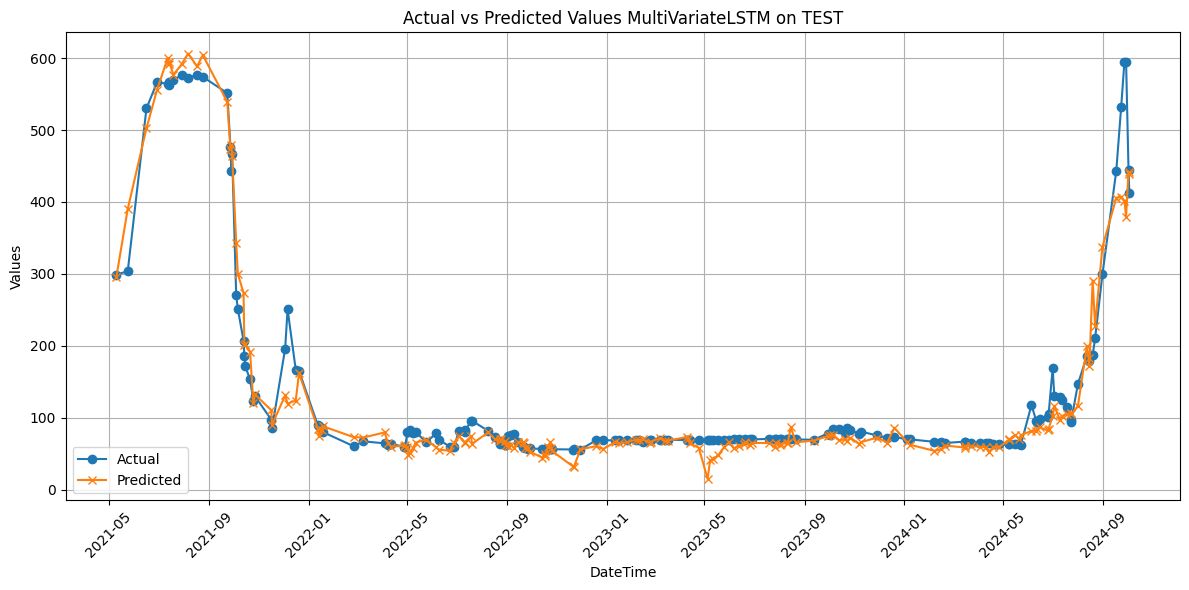

In [23]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

y_pred = y_pred.flatten()
predictions_df = pd.DataFrame(y_pred, index=datetime_index, columns=['Predicted'])
y_test_df = pd.DataFrame(y_test, index=datetime_index, columns=['Actual'])
predictions_df = predictions_df.sort_index()
y_test_df = y_test_df.sort_index()

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(predictions_df.index, y_test_df['Actual'], label='Actual', marker='o')
plt.plot(y_test_df.index, predictions_df['Predicted'], label='Predicted', marker='x')
plt.title('Actual vs Predicted Values MultiVariateLSTM on TEST')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()